<a href="https://colab.research.google.com/github/deethereal/NN/blob/main/MNIST/MNIST_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf, numpy as np, matplotlib.pyplot as plt
from tensorflow import keras


In [3]:
print(tf.__version__)

2.6.0


In [4]:
MNIST=keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = MNIST.load_data()


In [5]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


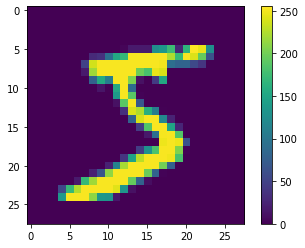

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0

test_images = test_images / 255.0


In [8]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [9]:
model=keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), #flatten преобразует в матрциу 28*28
  keras.layers.Dropout(0.1),
  keras.layers.Dense(128,activation='relu'), #Dense нейронный слой 
  keras.layers.Dropout(0.1),
  keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images,train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3014 - accuracy: 0.9117
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1466 - accuracy: 0.9564
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1100 - accuracy: 0.9665
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - accuracy: 0.9722
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0764 - accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0673 - accuracy: 0.9784
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0581 - accuracy: 0.9816
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9819
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0494 - accuracy: 0.9839
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.047

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

313/313 - 1s - loss: 0.0682 - accuracy: 0.9789

Точность на проверочных данных: 0.9789000153541565


In [12]:
predictions = model.predict(test_images)

In [1]:
import torch
if torch.cuda.is_available():
  device = torch.device("cuda")

In [24]:
x_train  = np.expand_dims(train_images, -1)
x_test  = np.expand_dims(test_images, -1)
y_train = keras.utils.to_categorical(train_labels, 10)
y_test = keras.utils.to_categorical(test_labels, 10)
convmodel=keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu",kernel_initializer='he_normal', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu",kernel_initializer='he_normal', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"),
])
call_backs =[
    tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss'),
    ]
batch_size = 100
epochs = 50

convmodel.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

convmodel.fit(x_train , y_train, batch_size=batch_size, epochs=epochs, validation_split=0.15,callbacks=call_backs)

Epoch 1/50
510/510 [==============================] - 6s 11ms/step - loss: 0.1698 - accuracy: 0.9496 - val_loss: 0.0550 - val_accuracy: 0.9842
Epoch 2/50
510/510 [==============================] - 5s 10ms/step - loss: 0.0494 - accuracy: 0.9845 - val_loss: 0.0449 - val_accuracy: 0.9869
Epoch 3/50
510/510 [==============================] - 5s 10ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 4/50
510/510 [==============================] - 5s 10ms/step - loss: 0.0258 - accuracy: 0.9912 - val_loss: 0.0311 - val_accuracy: 0.9909
Epoch 5/50
510/510 [==============================] - 5s 10ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0386 - val_accuracy: 0.9901
Epoch 6/50
510/510 [==============================] - 5s 10ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0351 - val_accuracy: 0.9914
Epoch 7/50
510/510 [==============================] - 5s 10ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0368 - val_accuracy: 0.9912

In [25]:
score = convmodel.evaluate(x_test, y_test, verbose=0)
print("Test loss convModel:", score[0])
print("Test accuracy convModel:", score[1])

Test loss convModel: 0.03239656984806061
Test accuracy convModel: 0.991100013256073


5


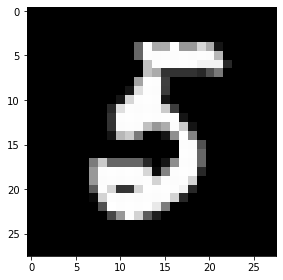

In [ ]:
idx=np.random.randint(10000)
print(np.argmax(predictions[idx]))
plt.figure()
imshow(test_images[idx])


In [29]:
from google.colab import drive 
import cv2
from skimage.io import imread,imshow
drive.mount('/content/drive')
%cd "/content/drive/My Drive/digits"

Mounted at /content/drive
/content/drive/My Drive/digits


In [33]:
def pred(path, model):
  image = cv2.imread(path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)/255.0
  imshow(gray)
  plt.show()
  try:
    gray = (np.expand_dims(gray,0))
    return np.argmax(model.predict(gray))
  except:
    gray=np.expand_dims(gray, -1)
    return np.argmax(model.predict(gray))


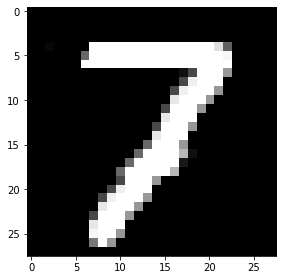

NN thinks this is: 7


In [34]:
ipath='seven1.png'

print("NN thinks this is:",pred(ipath, convmodel))